(366, 22)
          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.00000

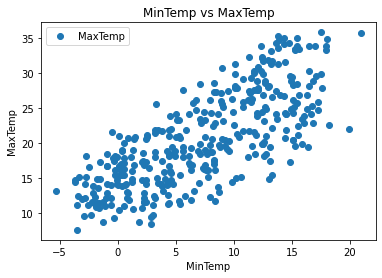

C:\Users\Aryan Maheshwari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


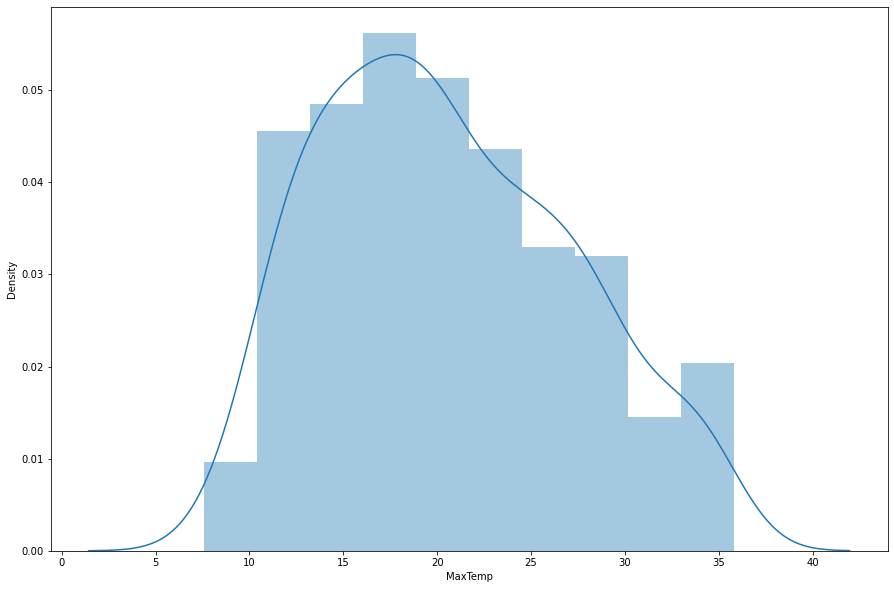

intercept: [14.56202411]
coeffecient: [[0.81953755]]
    Actual  predicted
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
..     ...        ...
69    18.9  20.216833
70    22.8  27.674625
71    16.1  21.446140
72    25.1  24.970151
73    12.2  14.070302

[74 rows x 2 columns]


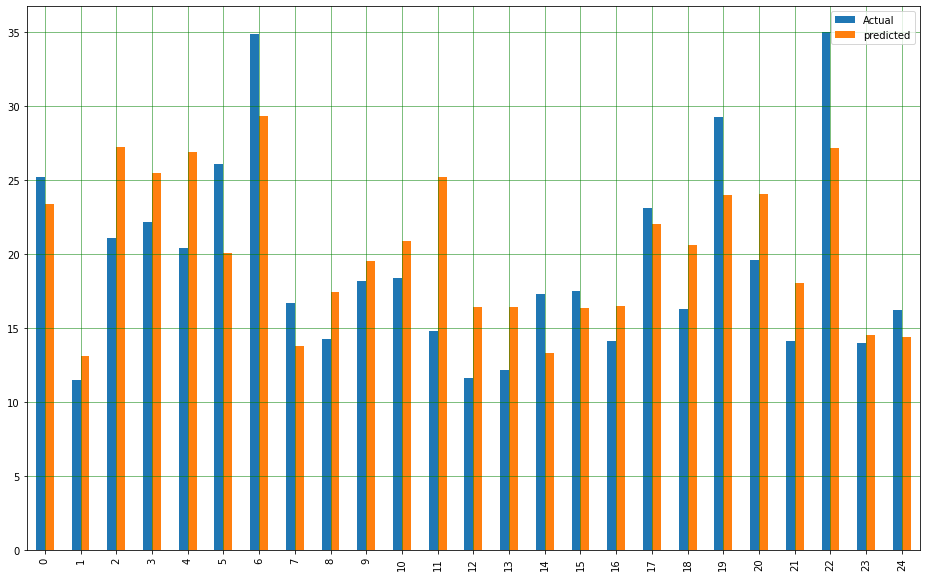

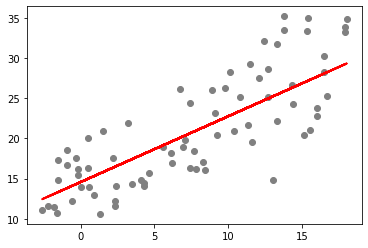

mean absolute error: 3.5094353112899594
mean squared errors: 17.011877668640622
root mean squared erros: 4.124545753006096


In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset= pd.read_csv('E:\dataset folder\weather.csv')
print(dataset.shape)

print(dataset.describe())

dataset.plot(x='MinTemp',y='MaxTemp',style='o')

plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset["MaxTemp"])
plt.show()

#datasplicing

x=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train) #training the alogorithm


#To retrive the intecept:

print("intercept:",regressor.intercept_)

print("coeffecient:",regressor.coef_)

y_pred = regressor.predict(x_test)

df = pd.DataFrame({"Actual":y_test.flatten(),"predicted":y_pred.flatten()})
print(df)

df1 = df.head(25)
df1.plot(kind ="bar" , figsize=(16,10))
plt.grid(which="major",linestyle = "-", linewidth ="0.5" , color ="g")
plt.grid(which="minor",linestyle = ":", linewidth ="0.5" , color ="b")
plt.show()


plt.scatter(x_test , y_test, color ="grey")
plt.plot(x_test, y_pred , color = "red", linewidth=2)
plt.show()

print("mean absolute error:", metrics.mean_absolute_error(y_test,y_pred))
print("mean squared errors:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared erros:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
